<center>
  <h2 style="font-family: Arial, sans-serif; font-weight: bold;">Handwritten Digit Recognition with Support Vector Machines (SVM)</h2>
</center>

---------------------------------------------------------------------------------------------

<h5 style="font-family: Arial, sans-serif;">Name: JADHAV BHUVAN SAI</h5>
<h5 style="font-family: Arial, sans-serif;">Roll No: 2021BCS0153</h5>

---------------------------------------------------------------------------------------------

<b>This project aims to build a model using Support Vector Machines (SVM) to recognize handwritten digits from the MNIST dataset, a standard benchmark in computer vision and deep learning. 
The goal is to classify images of handwritten digits into one of 10 classes representing integer values from 0 to 9.</b>

In [4]:
# import all necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import joblib

<h4><u><b>1. Importing Data:</u></b><br> </h4>
Acquire the MNIST dataset comprising 70,000 images of handwritten digits. The dataset is accessible in various formats such as CSV, JSON, etc. Select a format compatible with your chosen programming language. For instance, I opted Python, and prefer downloading the dataset in CSV format.

In [5]:
#import file and reading few lines
train_data = pd.read_csv('mnist_train.csv')
train_data.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#import file and reading few lines
test_data = pd.read_csv('mnist_test.csv')
test_data.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Viewing the Shape of the train dataset
train_data.shape

(60000, 785)

In [8]:
# Viewing the Shape of the test dataset
test_data.shape

(10000, 785)

<h3><b>Data understanding and exploration</b></h3>

In [9]:
#checking datatype of train dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [10]:
#checking datatype of test dataset
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


<b>◦ Datatype summary : </b> All the columns of train and test dataset are of dtype - int64.

In [11]:
#Describing about the train dataset
train_data.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [12]:
#Describing about the test dataset
test_data.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,4.443400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179300,0.163600,0.052600,0.0006,0.0,0.0,0.0,0.0,0.0,0.0
std,2.895865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.674149,5.736072,2.420004,0.0600,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#checking for null values in train dataset
round(100*(train_data.isnull().sum()/(len(train_data.index))),2).sort_values(ascending = False)

label    0.0
19x12    0.0
19x14    0.0
19x15    0.0
19x16    0.0
        ... 
10x12    0.0
10x13    0.0
10x14    0.0
10x15    0.0
28x28    0.0
Length: 785, dtype: float64

In [14]:
#checking for null values in test dataset
round(100*(test_data.isnull().sum()/(len(test_data.index))),2).sort_values(ascending = False)

label    0.0
19x12    0.0
19x14    0.0
19x15    0.0
19x16    0.0
        ... 
10x12    0.0
10x13    0.0
10x14    0.0
10x15    0.0
28x28    0.0
Length: 785, dtype: float64

<b>◦ Null value summary : </b> In both the MNIST train and test dataset, we find no null or missing values, setting the stage for captivating data analysis.


<h3><b>Column- Label</b></h3>

In [15]:
# let us check unique entries of label column in train dataset
np.unique(train_data['label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
# let us check unique entries of label column in test dataset
np.unique(test_data['label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
 # Examining the count of samples corresponding to each label in train dataset.
train_data['label'].value_counts()

label
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

In [18]:
 # Examining the count of samples corresponding to each label in train dataset.
test_data['label'].value_counts()

label
1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: count, dtype: int64

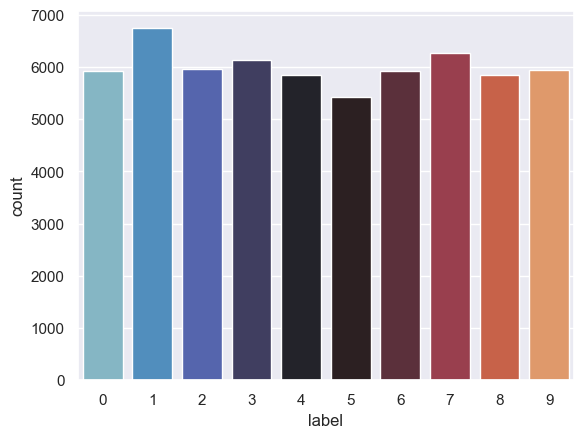

In [66]:
# Visualize the distribution of labels for train dataset
sns.countplot(x='label', data=train_data, palette='icefire')
plt.show()

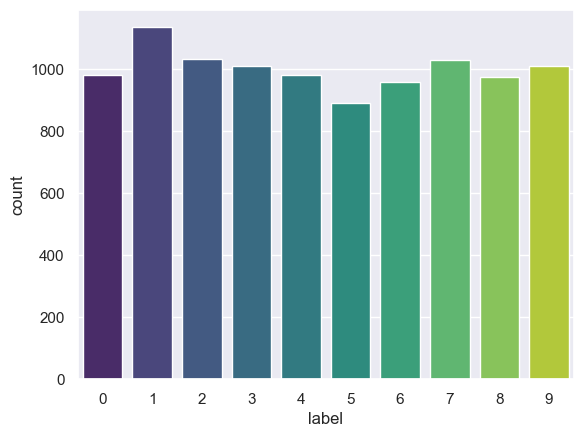

In [70]:
# Visualize the distribution of labels for test dataset
sns.countplot(x='label', data=test_data, palette='viridis')
plt.show()

<h3><b>Let us examine few pixels</b></h3>

Text(0, 0.5, 'Frequency')

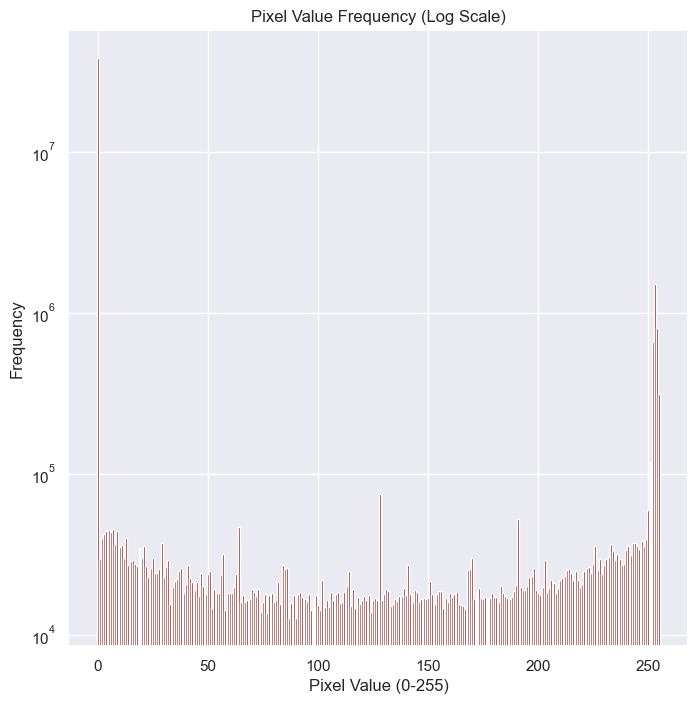

In [41]:
# for training dataset
y = pd.value_counts(train_data.values.ravel()).sort_index()
N = len(y)
x = range(N)
width =0.9
plt.figure(figsize=[8,8])
plt.bar(x, y, width, color="maroon")
plt.title('Pixel Value Frequency (Log Scale)')
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

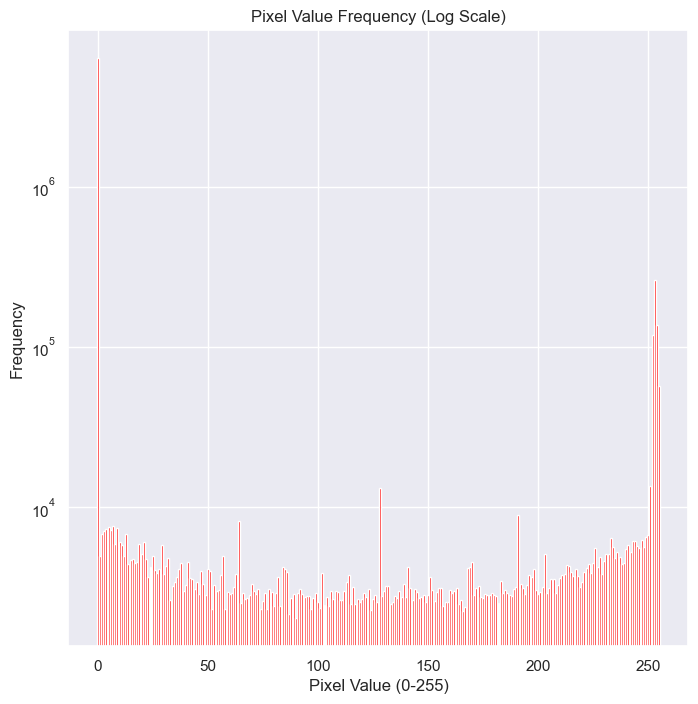

In [42]:
# for test dataset
y = pd.value_counts(test_data.values.ravel()).sort_index()
N = len(y)
x = range(N)
width =0.9
plt.figure(figsize=[8,8])
plt.bar(x, y, width, color="red")
plt.title('Pixel Value Frequency (Log Scale)')
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')

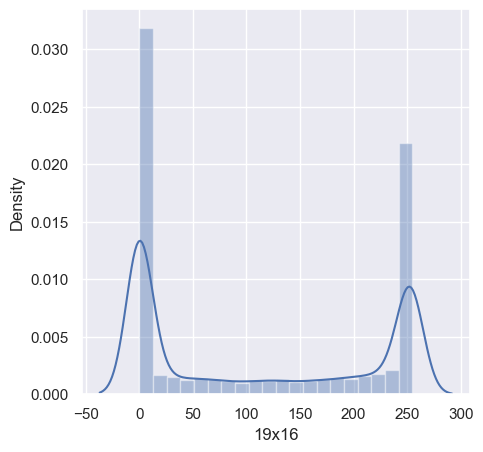

In [72]:
#for training dataset
plt.figure(figsize=(5,5))
sns.distplot(train_data['19x16'])
plt.show()

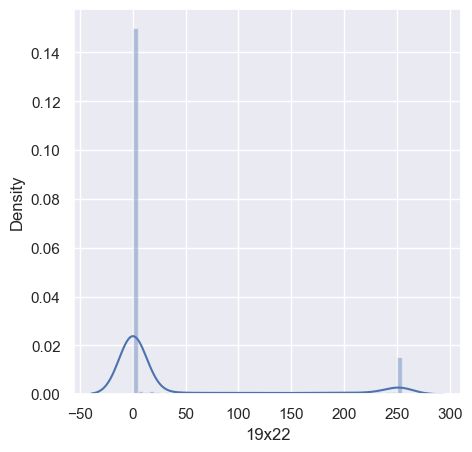

In [80]:
#for test dataset
plt.figure(figsize=(5,5))
sns.distplot(test_data['19x22'])
plt.show()

<h3><b>label vs pixel</b></h3>

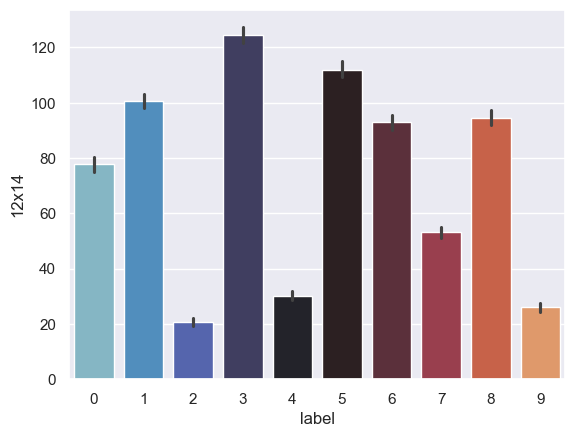

In [82]:
#for training dataset
sns.barplot(x='label', y='12x14', data=train_data, palette='icefire')
plt.show()

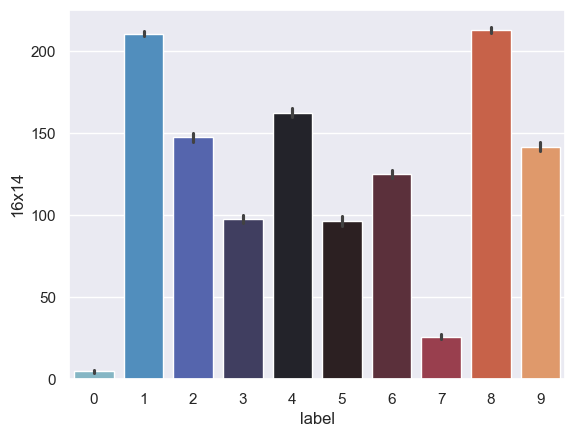

In [83]:
#for training dataset
sns.barplot(x='label', y='16x14', data=train_data, palette='icefire')
plt.show()

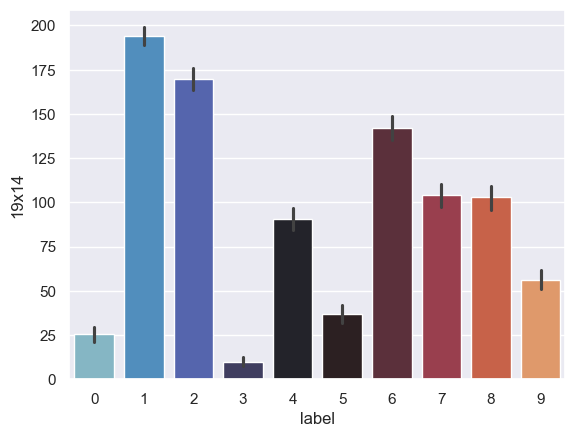

In [85]:
#for test dataset
sns.barplot(x='label', y='19x14', data=test_data, palette='icefire')
plt.show()

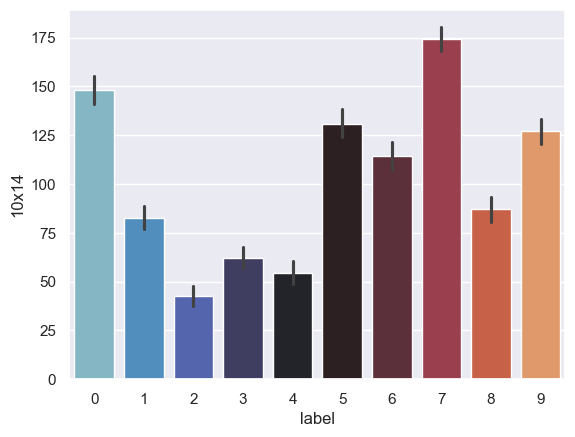

In [86]:
#for test dataset
sns.barplot(x='label', y='10x14', data=test_data, palette='icefire')
plt.show()

<h3><b>Let us visualize few numbers:</b></h3>

Text(0.5, 1.0, 'Digit 7')

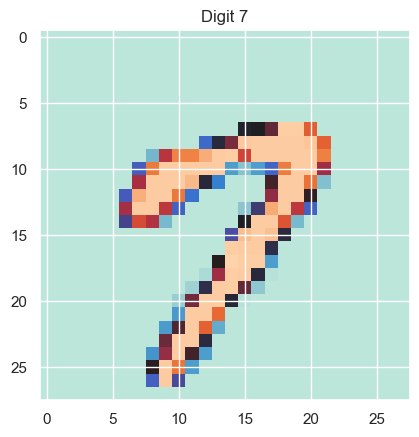

In [94]:
#Visualzing few numbers
seven = train_data.iloc[15, 1:]
seven.shape
seven = seven.values.reshape(28,28)
plt.imshow(seven, cmap='icefire')
plt.title("Digit 7")

Text(0.5, 1.0, 'Digit 2')

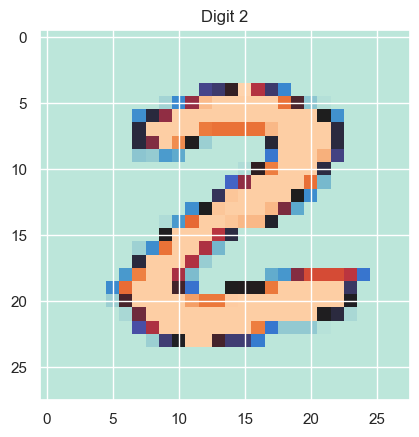

In [93]:
two = train_data.iloc[25, 1:]
two.shape
two = two.values.reshape(28,28)
plt.imshow(two, cmap='icefire')
plt.title("Digit 2")

Text(0.5, 1.0, 'Digit 1')

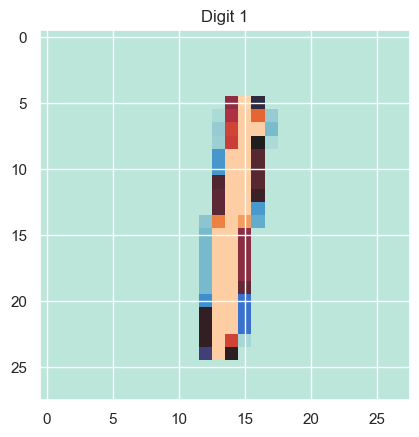

In [95]:
one = train_data.iloc[40, 1:]
one.shape
one = one.values.reshape(28,28)
plt.imshow(one, cmap='icefire')
plt.title("Digit 1")

<h3><b>Let us check heatmap</b></h3>

<Axes: >

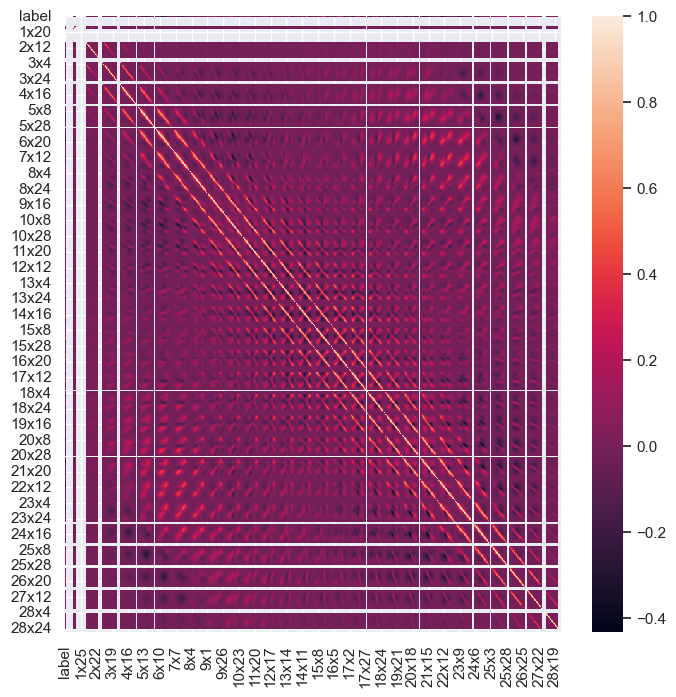

In [109]:
#for training dataset
plt.figure(figsize=(8,8))
sns.heatmap(data=train_data.corr(),annot=False)

<Axes: >

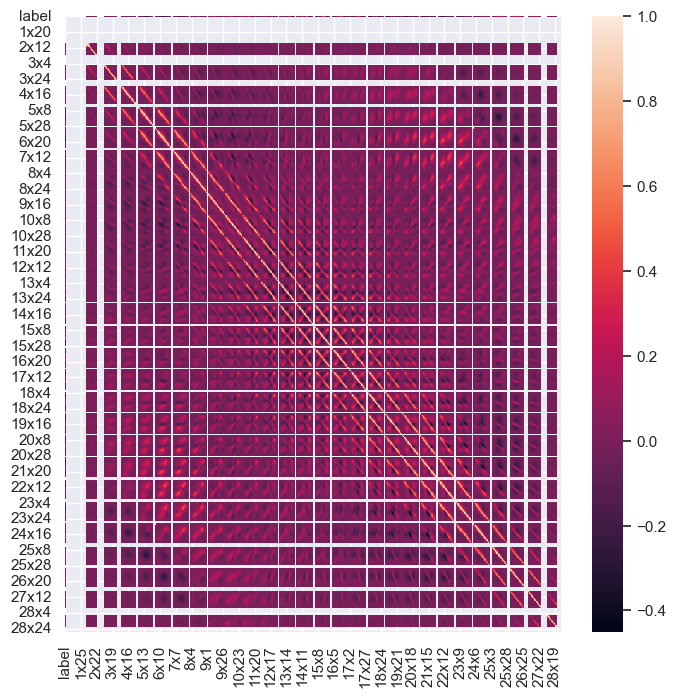

In [110]:
#for test dataset
plt.figure(figsize=(8,8))
sns.heatmap(data=test_data.corr(),annot=False)

<b>Heatmap summary : </b>The heatmap shows that most neighboring pixel values are related, which is what we would anticipate."

<h3><b>Data Preparation</b></h3>

In [111]:
# Mean feature values in simpler terms for train dataset
pd.set_option('display.max_rows', 50)
round(train_data.drop('label', axis=1).mean(), 2).sort_values(ascending = False)

15x16    139.55
16x16    139.11
15x17    137.10
16x15    135.69
8x16     135.40
          ...  
9x1        0.00
10x1       0.00
13x1       0.00
14x1       0.00
28x28      0.00
Length: 784, dtype: float64

In [112]:
# Mean feature values in simpler terms for test dataset
pd.set_option('display.max_rows', 50)
round(test_data.drop('label', axis=1).mean(), 2).sort_values(ascending = False)

16x16    142.94
15x16    142.78
15x17    140.38
16x15    138.15
22x15    137.97
          ...  
13x28      0.00
14x1       0.00
14x28      0.00
1x2        0.00
28x28      0.00
Length: 784, dtype: float64


<b>Data Preparation Overview: </b>Considering the feature values averaging from 140 to 0, it's advisable to scale them for uniformity. Thus, let's proceed with data preprocessing.

<h4><u><b>2. Data Preprocessing: </b><br></u></h4>
Begin by partitioning the dataset into training and testing subsets. The training set will facilitate model training, while the testing set will assess its performance.

In [113]:
# splitting train dataset into X and Y
X_train = train_data.drop("label", axis = 1)
Y_train = train_data['label']

In [114]:
# splitting test dataset into X and Y
X_test = test_data.drop("label", axis = 1)
Y_test = test_data['label']

In [122]:
# scaling the features
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [123]:
print('X_train shape:',X_train.shape)
print('Y_train shape:',Y_train.shape)
print('X_test shape:',X_test.shape)
print('Y_test shape:',Y_test.shape)

X_train shape: (60000, 784)
Y_train shape: (60000,)
X_test shape: (10000, 784)
Y_test shape: (10000,)



<h4><u><b>3. Model Building : </b><br></u></h4>
 Proceed to build a Support Vector Machine (SVM) model utilizing a fitting library like scikit-learn in Python. Opt for suitable hyperparameters such as the kernel function and regularization parameter for optimal model performance.

Let's initially train our dataset on three different models: linear SVM, along with non-linear SVM models using polynomial (poly) and radial basis function (rbf) kernels. We'll compare their performance and conduct a grid search for hyperparameter tuning on the most promising model.

1. Let us first try - <b>Linear model</b>:

In [134]:
# Linear model
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, Y_train)

# predict
Y_pred = model_linear.predict(X_test)

In [135]:
# confusion matrix and accuracy, precision, recall

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred), "\n")


# cm
print(metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred))

accuracy: 0.9293 

[[ 951    0    5    2    2    8    8    2    1    1]
 [   0 1119    6    2    0    1    2    1    4    0]
 [  10   13  956   11    7    4    5    6   18    2]
 [   7    1   15  941    0   16    1    6   19    4]
 [   3    2   18    1  929    0    3    5    4   17]
 [   7    6    7   41    6  789   12    2   19    3]
 [  12    3   13    1    8   17  902    0    2    0]
 [   2    8   23   13   10    1    0  945    5   21]
 [  12    6   11   28    8   24    9    6  858   12]
 [   6    7    6   10   36    4    1   23   13  903]]


In [136]:
#precision, recall and f1-score
scores=metrics.classification_report(Y_test, Y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       980
           1       0.96      0.99      0.97      1135
           2       0.90      0.93      0.91      1032
           3       0.90      0.93      0.91      1010
           4       0.92      0.95      0.93       982
           5       0.91      0.88      0.90       892
           6       0.96      0.94      0.95       958
           7       0.95      0.92      0.93      1028
           8       0.91      0.88      0.90       974
           9       0.94      0.89      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [137]:
# Saving the model
joblib.dump(model_linear, 'linear_svm.pkl')

['linear_svm.pkl']

<b> Linear model summary : </b>The linear model gives approx. 92.93% accuracy.<BR>
NOW, Let's look at a non-linear model with randomly chosen hyperparameters.

2. <b>Non_linear model</b> (Poly kernel): <br>
<br>
<b>Poly kernel</b> - The polynomial kernel computes the similarity between samples using polynomial functions, allowing for non-linear decision boundaries. It's parameterized by degree, controlling the polynomial's complexity, and coefficient \( c \), affecting the influence of higher-degree terms.

In [140]:
# Non-linear model
# using poly kernel, C=1, default value of gamma

# model
non_linear_model_poly = SVC(kernel='poly')

# fit
non_linear_model_poly.fit(X_train, Y_train)

# predict
Y_pred = non_linear_model_poly.predict(X_test)

In [142]:
# confusion matrix and accuracy, precision, recall

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred))

accuracy: 0.9611 

[[ 962    0    0    1    0    3    4    0   10    0]
 [   0 1122    3    0    2    1    4    0    3    0]
 [   6    0  973    3    3    1    2    7   37    0]
 [   0    0    1  971    1    3    2    5   22    5]
 [   0    0    2    0  955    0    6    2    4   13]
 [   2    1    3    3    2  863    6    1    9    2]
 [   5    3    1    0    8    8  919    0   14    0]
 [   1    8   11    2   12    0    0  958   11   25]
 [   1    0    3    6    5    8    1    3  943    4]
 [   3    4    1   11   24    3    0    4   14  945]]


In [143]:
#precision, recall and f1-score
scores=metrics.classification_report(Y_test, Y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.94      0.96      1032
           3       0.97      0.96      0.97      1010
           4       0.94      0.97      0.96       982
           5       0.97      0.97      0.97       892
           6       0.97      0.96      0.97       958
           7       0.98      0.93      0.95      1028
           8       0.88      0.97      0.92       974
           9       0.95      0.94      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [145]:
# Saving the model
joblib.dump(non_linear_model_poly, 'nonlinear_poly_svm.pkl')

['nonlinear_poly_svm.pkl']

<b> Poly kernal (Non-linear) model summary : </b>The linear model gives approx. 96.11% accuracy.<BR>
NOW, Let's look at a Rbf model.

3. <b>Non_linear model</b> (Rbf kernel): <br> 
<br>
<b>RBF Kernel</b> - The radial basis function (RBF) kernel calculates the similarity between samples based on their distance in a high-dimensional space. It's controlled by a parameter 
γ
γ, determining the influence of individual training samples, and is effective for capturing complex, non-linear relationships in the data.

In [146]:
# Non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, Y_train)

# predict
Y_pred = non_linear_model.predict(X_test)

In [147]:
# confusion matrix and accuracy, precision, recall

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred))

accuracy: 0.966 

[[ 968    0    1    1    0    3    3    2    2    0]
 [   0 1127    3    0    0    1    2    0    2    0]
 [   5    1  996    2    2    0    1   15    9    1]
 [   0    0    4  979    1    7    0   12    7    0]
 [   0    0   12    0  944    2    4    7    3   10]
 [   2    0    1   10    2  854    6    8    7    2]
 [   6    2    1    0    4    8  930    2    5    0]
 [   1    6   13    2    3    0    0  990    0   13]
 [   3    0    4    6    6    9    3   14  926    3]
 [   4    6    5   11   12    2    0   20    3  946]]


In [148]:
#precision, recall and f1-score
scores=metrics.classification_report(Y_test, Y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.97      0.98       958
           7       0.93      0.96      0.94      1028
           8       0.96      0.95      0.96       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [149]:
# Saving the model
joblib.dump(non_linear_model, 'nonlinear_rbf_svm.pkl')

['nonlinear_rbf_svm.pkl']

<b> Rbf kernal (Non-linear) model summary : </b>The linear model gives approx. 96.6% accuracy.<BR>


As we clearly see that the Non-linear Rbf model gives approx. 96.6% accuracy. And most of the precision is above 90%.Thus, going forward, let's choose hyperparameters corresponding to non-linear rbf models.

<h4><u><b>Grid Search: Hyperparameter Tuning</b></u></h4>
Grid search hyperparameter tuning involves systematically exploring a predefined set of hyperparameters to find the combination that yields the best model performance. It's performed by sampling a subset of the training data and selecting the optimal parameters based on their performance.

In [150]:
# Assuming X_train and Y_train are your full training data
# Splitting your data into a smaller subset
X_train_small, _, Y_train_small, _ = train_test_split(X_train, Y_train, train_size=10000, stratify=Y_train, random_state=101)

folds = KFold(n_splits=5, shuffle=True, random_state=101)
hyper_params = [{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100]}]

svm_model = SVC(kernel="rbf")

grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=hyper_params,
    scoring='accuracy',
    cv=folds,
    verbose=1,
    return_train_score=True,
    n_jobs=-1
)

grid_search.fit(X_train_small, Y_train_small)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Hyperparameters: {'C': 10, 'gamma': 0.001}


In [151]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,114.931428,0.425957,11.387181,0.102039,1,0.01,"{'C': 1, 'gamma': 0.01}",0.7600,0.7505,0.7610,...,0.7582,0.009234,9,0.999500,0.999750,0.999750,0.999625,0.99975,0.999675,0.000100
1,27.740596,0.505125,6.508215,0.144510,1,0.001,"{'C': 1, 'gamma': 0.001}",0.9325,0.9340,0.9360,...,0.9358,0.002293,3,0.973875,0.975000,0.974500,0.974250,0.97475,0.974475,0.000391
2,37.156118,1.276731,8.954492,0.191185,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.9005,0.9035,0.9075,...,0.9064,0.003852,6,0.918750,0.921375,0.918875,0.917375,0.91775,0.918825,0.001398
3,113.670184,0.756016,11.140268,0.127785,10,0.01,"{'C': 10, 'gamma': 0.01}",0.7785,0.7700,0.7805,...,0.7760,0.007810,7,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
4,22.012344,0.609509,5.685382,0.130926,10,0.001,"{'C': 10, 'gamma': 0.001}",0.9450,0.9440,0.9465,...,0.9450,0.001140,1,0.998625,0.999000,0.998875,0.998500,0.99850,0.998700,0.000203
5,16.266762,0.597096,5.273710,0.255060,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.9245,0.9265,0.9305,...,0.9310,0.005273,5,0.962000,0.961625,0.962250,0.959875,0.96075,0.961300,0.000875
6,113.840299,1.324607,11.037879,0.160972,100,0.01,"{'C': 100, 'gamma': 0.01}",0.7785,0.7700,0.7805,...,0.7760,0.007810,7,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
7,22.359596,0.284850,5.868375,0.150648,100,0.001,"{'C': 100, 'gamma': 0.001}",0.9420,0.9420,0.9435,...,0.9434,0.001319,2,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
8,11.487961,1.430108,3.885744,0.618089,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.9275,0.9300,0.9265,...,0.9311,0.004042,4,0.993250,0.994875,0.993500,0.993250,0.99300,0.993575,0.000669


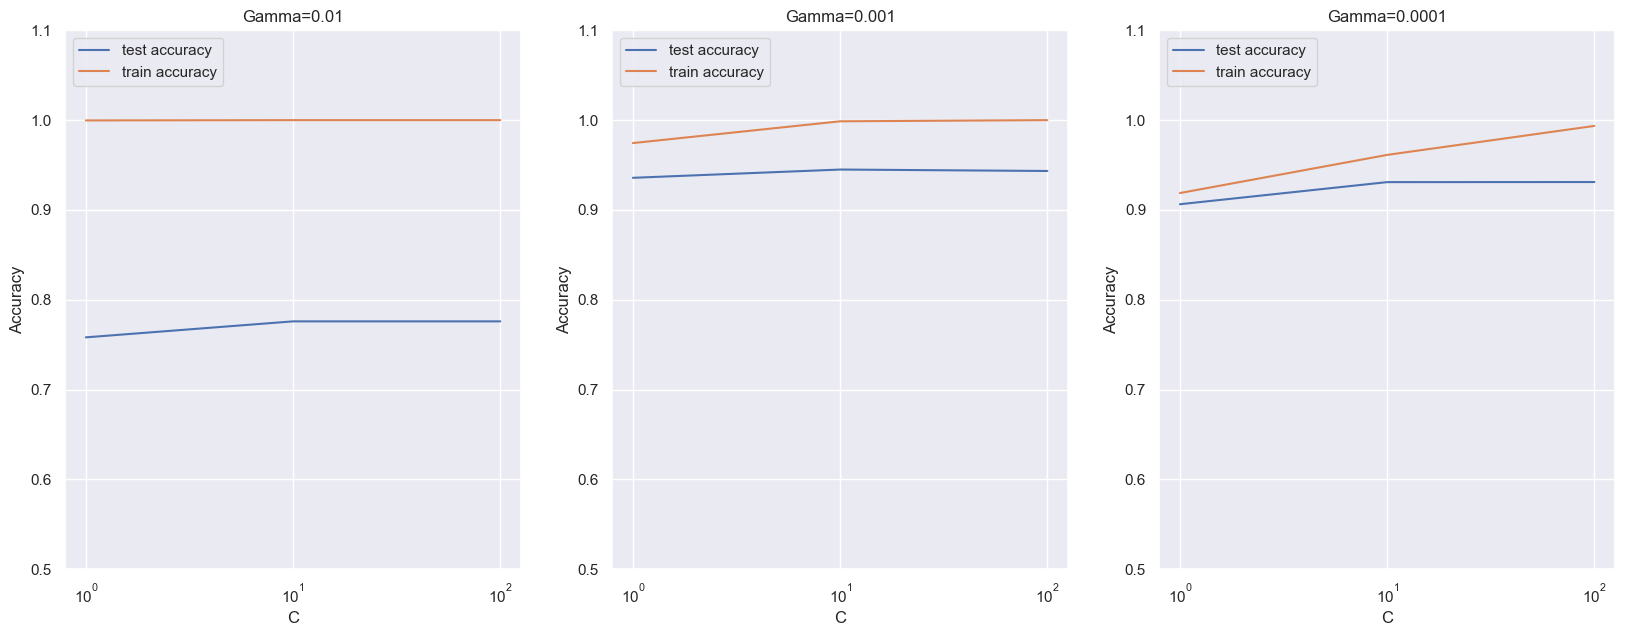

In [152]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(20,7))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [153]:
# printing the optimal accuracy score and hyperparameters
best_score = grid_search.best_score_
best_hyperparams = grid_search.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.945 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


Let us take the best value ({'C': 10, 'gamma': 0.001}) as suggested by the sklearn.


<h4><u><b>4. Model Training : </b><br></u></h4>
Model training involves feeding the algorithm with the training data to allow it to learn the underlying patterns and relationships within the data. In the case of Support Vector Machine (SVM), this entails fitting the SVM model to the training dataset using the selected kernel function and hyperparameters. The trained model can then be used to make predictions on new, unseen data.

In [154]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(Y_test, Y_pred), "\n")
print(metrics.confusion_matrix(Y_test, Y_pred), "\n")

accuracy 0.9733 

[[ 968    0    3    3    1    2    1    1    1    0]
 [   0 1128    3    0    0    1    2    1    0    0]
 [   6    3 1001    0    2    0    1   12    6    1]
 [   0    0    4  985    1    6    0    6    7    1]
 [   0    0    6    0  954    1    3    6    3    9]
 [   3    0    1    8    2  864    3    5    5    1]
 [   4    2    1    0    3    9  935    2    2    0]
 [   0    4   10    2    2    0    0 1000    0   10]
 [   3    2    3    5    4    9    2    8  932    6]
 [   1    5    2    8   11    3    0   11    2  966]] 




<h4><u><b>5. Model Evaluation : </b><br></u></h4>
Model evaluation is the process of assessing the performance of a trained model on unseen data. For a Support Vector Machine (SVM) model, evaluation typically involves calculating various metrics such as accuracy, precision, recall, F1-score, and the confusion matrix. These metrics provide insights into how well the model generalizes to new data and its ability to correctly classify instances. Additionally, techniques like cross-validation can be used to ensure robust evaluation by splitting the dataset into multiple subsets for training and testing.

In [155]:
# different class-wise accuracy - #precision, recall and f1-score
scores=metrics.classification_report(Y_test, Y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.99      0.98      0.98       958
           7       0.95      0.97      0.96      1028
           8       0.97      0.96      0.96       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



We see that with hyperparameter - C = 10 and gamma = 0.001, we see overall accuracy of the model is 97% and also precision for each label is above 95%.

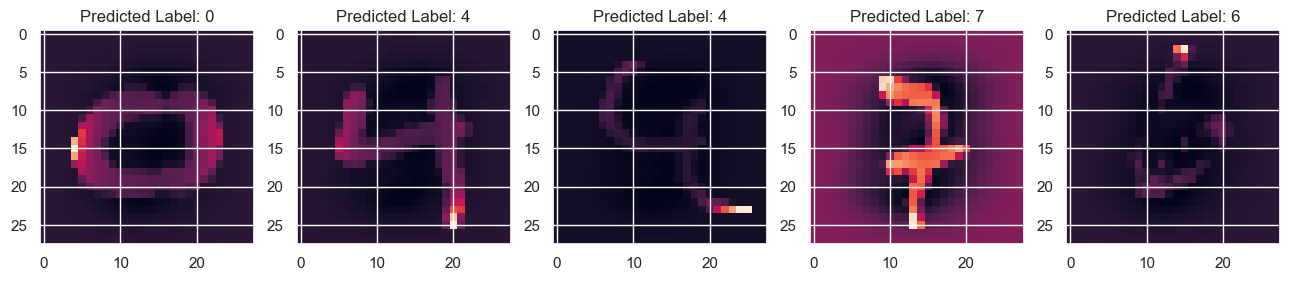

In [157]:
# Let us visualize our final model on unseen training dataset

df = np.random.randint(1,Y_pred.shape[0]+1,5)

plt.figure(figsize=(16,4))
for i,j in enumerate(df):
    plt.subplot(150+i+1)
    d = X_test[j].reshape(28,28)
    plt.title(f'Predicted Label: {Y_pred[j]}')
    plt.imshow(d)
plt.show()

In [158]:
#Saving the final model
joblib.dump(model, 'updated_rbf_svm.pkl')

['updated_rbf_svm.pkl']

In [ ]:
import pygame , sys
from pygame.locals import *
import numpy as np
from keras.models import load_model 
import cv2

model = joblib.load('updated_rbf_svm.pkl')
WINDOWSIZEX = 640
WINDOWSIZEY = 480

WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
RED = (255, 0 , 0)

IMAGESAVE = False

BOUNDRY = 5

LABELS ={0: "ZERO", 1: "ONE", 2: "TWO", 3: "THREE", 4: "FOUR", 5: "FIVE" , 6: "SIX", 7: "SEVEN", 8: "EIGHT", 9: "NINE"}

# initialize pygame
pygame.init()

FONT = pygame.font.SysFont("Arial", 20)
DISPLAYSURF = pygame.display.set_mode((WINDOWSIZEX, WINDOWSIZEY)) # set up window size

pygame.display.set_caption("JADHAV'S HANDWRITTEN DIGIT RECOGNIZER ") # set up window title

iswriting = False

number_xcord = []
number_ycord = []
image_cnt = 1

PREDICT = True
while True:
    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            sys.exit()
        
        if event.type == MOUSEMOTION and iswriting:
            xcord, ycord = event.pos
            pygame.draw.circle(DISPLAYSURF, WHITE, (xcord, ycord), 4,0)
            
            number_xcord.append(xcord)
            number_ycord.append(ycord)


        if event.type == MOUSEBUTTONDOWN:
            iswriting = True
        
        if event.type == MOUSEBUTTONUP:
            iswriting = False
            number_xcord = sorted(number_xcord)
            number_ycord = sorted(number_ycord)

            rect_min_x , rect_max_x = max(number_xcord[0] - BOUNDRY, 0), min(number_xcord[-1] + BOUNDRY, WINDOWSIZEX)
            rect_min_y , rect_max_y = max(number_ycord[0] - BOUNDRY, 0), min(number_ycord[-1] + BOUNDRY, WINDOWSIZEY)
            number_xcord = []
            number_ycord = []

            img_arr = np.array(pygame.PixelArray(DISPLAYSURF))[rect_min_x:rect_max_x, rect_min_y:rect_max_y].T.astype(np.float32)

            if IMAGESAVE:
                cv2.imwrite("image.png")
                image_cnt += 1
            
            if PREDICT:


                image = cv2.resize(img_arr, (28, 28))

                # Flatten the image to create a 1D array
                image = image.flatten()

                # Scale the flattened image using the same scaler used for training data
                image = scaler.transform([image])

                # Predict using the SVM model
                y_pred_img = model.predict(image)

                # image = cv2.resize(img_arr, (28, 28))
                # image = np.pad(image, (10,10), "constant", constant_values=0)
                # image = cv2.resize(image, (28, 28))/255

                label = str(LABELS[np.argmax(y_pred_img)])
                textSurface = FONT.render(label, True, RED, WHITE)
                textRecObj = textSurface.get_rect()
                textRecObj.left , textRecObj.bottom = rect_min_x, rect_min_y

                DISPLAYSURF.blit(textSurface, textRecObj)

            if event.type == KEYDOWN :
               if event.unicode == "n":
                    DISPLAYSURF.fill(BLACK)
        

        pygame.display.update()

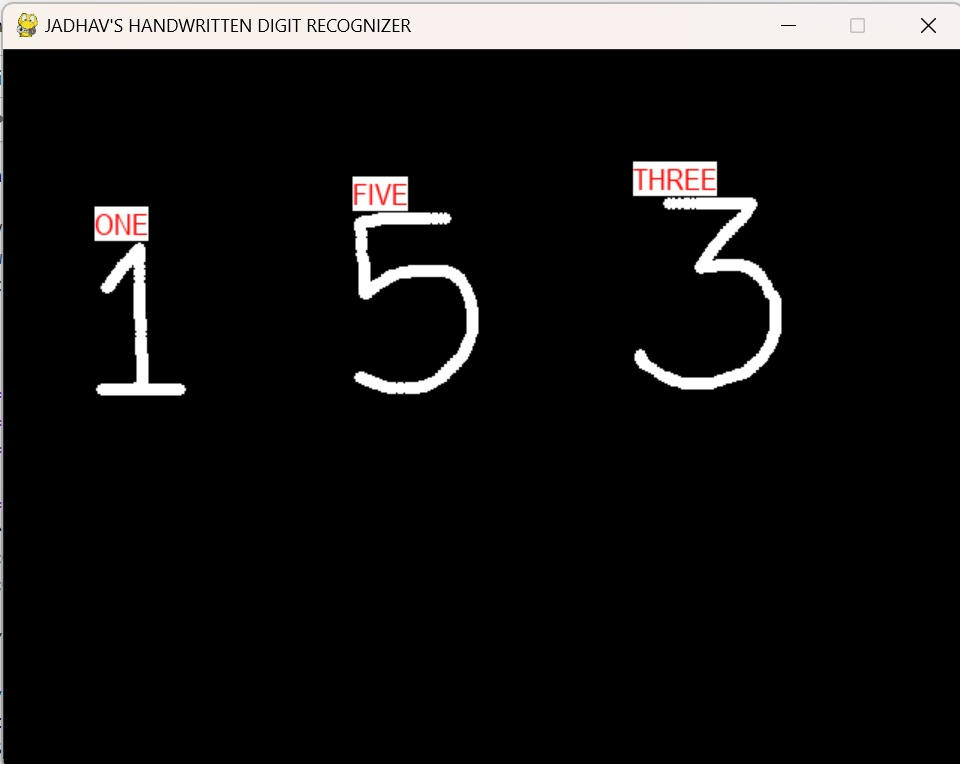

In [1]:
from IPython.display import Image

# Path to your image file
image_path = 'output.jpeg'

# Display the image
Image(filename=image_path)